In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/titanic.csv


In [2]:
dataset=pd.read_csv("/kaggle/input/titanic/titanic.csv")
dataset


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
dataset.head()
dataset.describe()
train=dataset.copy()
test=dataset.copy()

In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
train.drop(['PassengerId','Fare','Cabin','Name'],axis=1,inplace=True)

In [6]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Embarked
0,0,3,male,22.0,1,0,A/5 21171,S
1,1,1,female,38.0,1,0,PC 17599,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,S
3,1,1,female,35.0,1,0,113803,S
4,0,3,male,35.0,0,0,373450,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,S
887,1,1,female,19.0,0,0,112053,S
888,0,3,female,NaN,1,2,W./C. 6607,S
889,1,1,male,26.0,0,0,111369,C


In [7]:
train.drop(['Ticket'],axis=1,inplace=True)

In [8]:
train


,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,NaN,1,2,S
889,1,1,male,26.0,0,0,C


In [9]:
print('The median of "Age" is %.2f' %(train["Age"].median(skipna=True)))

The median of "Age" is 28.00


In [10]:
train['Age'].fillna(28, inplace=True)

In [11]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,28.0,1,2,S
889,1,1,male,26.0,0,0,C


Embarked (C = Cherbourg, Q = Queenstown, S = Southampton):

In [12]:
print(train['Embarked'].value_counts())

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [13]:
train['Embarked'].fillna('S', inplace=True)

In [14]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [15]:
train['TravelAlone']=np.where((train["SibSp"]+train["Parch"])>0, 0, 1)
train.drop('SibSp', axis=1, inplace=True)
train.drop('Parch', axis=1, inplace=True)

In [16]:
train['Sex'] = train['Sex'].replace(['male','female'],[0,1]).astype(int)
train['Embarked'] = train['Embarked'].replace(['S','Q','C'],[1,2,3]).astype(int)
train['Pclass'] = train['Embarked'].replace(['1','2','3'],[3,2,1]).astype(int)



train.head()

,Survived,Pclass,Sex,Age,Embarked,TravelAlone
0,0,1,0,22.0,1,0
1,1,3,1,38.0,3,0
2,1,1,1,26.0,1,1
3,1,1,1,35.0,1,0
4,0,1,0,35.0,1,1


In [17]:
test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [18]:
test.drop(['PassengerId','Fare','Cabin','Name','Ticket'],axis=1,inplace=True)
test['Age'].fillna(28, inplace=True)
test['Embarked'].fillna('S', inplace=True)


test['TravelAlone']=np.where((test["SibSp"]+test["Parch"])>0, 0, 1)

test.drop('SibSp', axis=1, inplace=True)
test.drop('Parch', axis=1, inplace=True)

test['Sex'] = test['Sex'].replace(['male','female'],[0,1]).astype(int)
test['Embarked'] = test['Embarked'].replace(['S','Q','C'],[1,2,3]).astype(int)
test['Pclass'] = test['Embarked'].replace(['1','2','3'],[3,2,1]).astype(int)

test.head()

,Survived,Pclass,Sex,Age,Embarked,TravelAlone
0,0,1,0,22.0,1,0
1,1,3,1,38.0,3,0
2,1,1,1,26.0,1,1
3,1,1,1,35.0,1,0
4,0,1,0,35.0,1,1


In [19]:
train['IsMinor']=np.where(train['Age']<=16, 1, 0)

test['IsMinor']=np.where(test['Age']<=16, 1, 0)

In [20]:
train

,Survived,Pclass,Sex,Age,Embarked,TravelAlone,IsMinor
0,0,1,0,22.0,1,0,0
1,1,3,1,38.0,3,0,0
2,1,1,1,26.0,1,1,0
3,1,1,1,35.0,1,0,0
4,0,1,0,35.0,1,1,0
...,...,...,...,...,...,...,...
886,0,1,0,27.0,1,1,0
887,1,1,1,19.0,1,1,0
888,0,1,1,28.0,1,0,0
889,1,3,0,26.0,3,1,0


In [21]:
test

,Survived,Pclass,Sex,Age,Embarked,TravelAlone,IsMinor
0,0,1,0,22.0,1,0,0
1,1,3,1,38.0,3,0,0
2,1,1,1,26.0,1,1,0
3,1,1,1,35.0,1,0,0
4,0,1,0,35.0,1,1,0
...,...,...,...,...,...,...,...
886,0,1,0,27.0,1,1,0
887,1,1,1,19.0,1,1,0
888,0,1,1,28.0,1,0,0
889,1,3,0,26.0,3,1,0


In [22]:
Y_train = train['Survived']
features = ['Pclass', 'Sex', 'Age', 'Embarked','TravelAlone','IsMinor']

In [23]:
def sigmoid(z):

    s = 1 / (1 + np.exp(-z))
    
    return s

In [24]:
def initialize_with_zeros(dim):
    
    w = np.zeros(shape=(dim, 1))
    b = 0

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [25]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T, X) + b)                                                   # compute activation
    cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))          # compute cost
        
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1 / m) * np.dot(X,(A - Y).T)
    db = (1 / m) * np.sum(A - Y)

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [26]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        grads, cost = propagate(w, b, X, Y)
                
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        w = w - learning_rate * dw 
        b = b - learning_rate * db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs       

In [27]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
       
    A = sigmoid(np.dot(w.T, X) + b)
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        Y_prediction[0, i] = 1 if A[0, i] >= 0.5 else 0
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [28]:
def model(X_train, Y_train, X_test, num_iterations , learning_rate , print_cost = False):
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost=False)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_train = predict(w, b, X_train)    
    Y_prediction_test = predict(w, b, X_test)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    d = {"costs": costs,         
         "Y_prediction_train" : Y_prediction_train, 
         "Y_prediction_test": Y_prediction_test,
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [29]:
train

,Survived,Pclass,Sex,Age,Embarked,TravelAlone,IsMinor
0,0,1,0,22.0,1,0,0
1,1,3,1,38.0,3,0,0
2,1,1,1,26.0,1,1,0
3,1,1,1,35.0,1,0,0
4,0,1,0,35.0,1,1,0
...,...,...,...,...,...,...,...
886,0,1,0,27.0,1,1,0
887,1,1,1,19.0,1,1,0
888,0,1,1,28.0,1,0,0
889,1,3,0,26.0,3,1,0


In [30]:
training=train.copy()
testing=test.copy()
training.drop('Survived', axis=1, inplace=True)
testing.drop('Survived', axis=1, inplace=True)
X_train = np.array(training).T
Y_train = np.array(Y_train)
Y_train = Y_train.reshape(Y_train.shape[0], 1).T
X_test = np.array(testing).T

assert X_train.shape[1] == Y_train.shape[1]
assert X_train.shape[0] == X_test.shape[0]
X_train.shape, Y_train.shape, X_test.shape

((6, 891), (1, 891), (6, 891))

In [31]:
d = model(X_train, Y_train, X_test, num_iterations = 5000, learning_rate = 0.01, print_cost = True)

train accuracy: 78.45117845117845 %


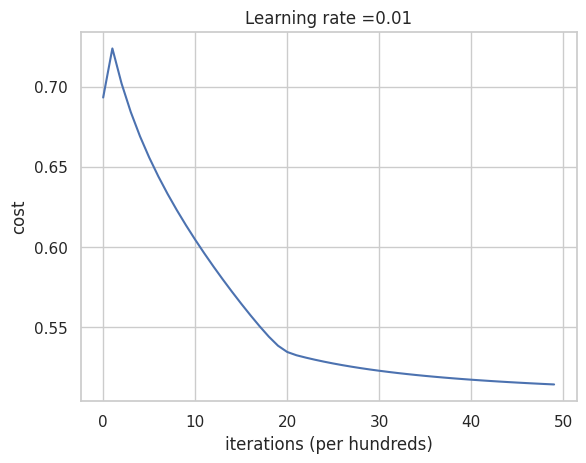

In [32]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()